### Importing the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.14.0'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

### Visualizing the images

In [9]:
np.random.randint(0, 59999)

38291

6


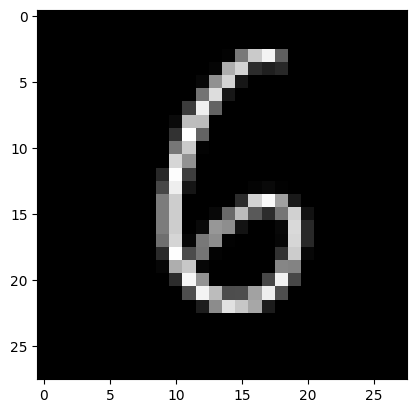

In [10]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [11]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

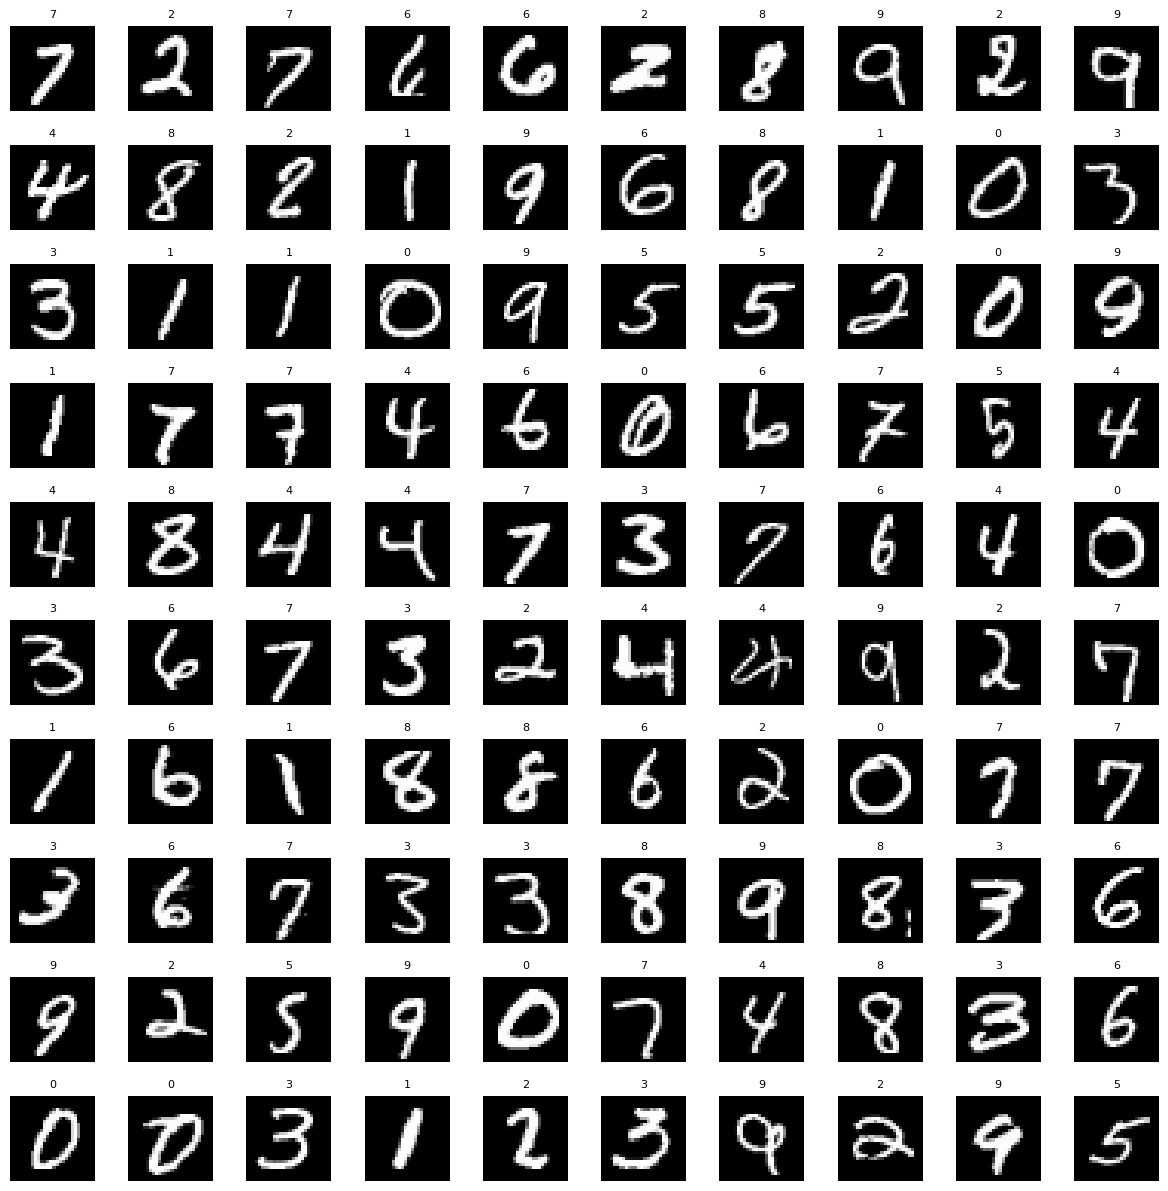

In [13]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))

#Print (axes.shape)
axes = axes.ravel() # -> (10,10) -> [100]

# Print (axes.shape)
for i in np.arange(0, width * height):
    index = np.random.randint(0, 59999)
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [14]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
X_train.shape[0], X_train.shape[1], X_test.shape[2]

(60000, 28, 28)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [20]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the autoencoder

In [21]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [22]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units=128, activation='relu', input_dim=784))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu')) # Encoded Image

# Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))

In [23]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [24]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1507 - accuracy: 0.0110
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1071 - accuracy: 0.0106
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0997 - accuracy: 0.0126
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0956 - accuracy: 0.0122
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0925 - accuracy: 0.0122
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0899 - accuracy: 0.0129
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0882 - accuracy: 0.0130
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0870 - accuracy: 0.0137
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0861 - accuracy: 0.0130
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0

### Encoding the images

In [27]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [28]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [29]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [30]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_2').output)

In [31]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


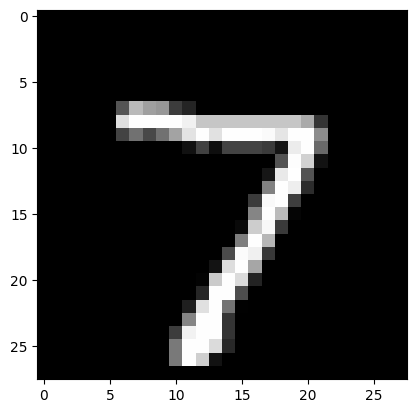

In [32]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [33]:
X_test[0].shape

(784,)

In [34]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [35]:
encode_image = encoder.predict(X_test[0].reshape(1, -1))

1/1 [==============================] - 0s 263ms/step


In [36]:
encode_image, encode_image.shape

(array([[6.3897552, 0.9222721, 0.       , 5.048046 , 0.       , 2.1713614,
         4.7563963, 1.9575808, 1.9136837, 4.9945483, 6.0769725, 3.6595294,
         3.8213115, 6.6408114, 4.4678802, 6.0090513, 5.931493 , 3.7286146,
         4.7085457, 4.01935  , 1.7113379, 2.77987  , 7.002561 , 3.2719388,
         6.5357113, 9.506304 , 4.043359 , 2.1535094, 5.1227856, 2.6179285,
         3.7915537, 3.5297375]], dtype=float32),
 (1, 32))

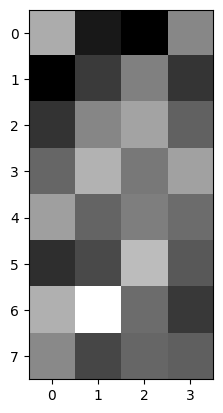

In [37]:
plt.imshow(encode_image.reshape(8,4), cmap='gray');

### Decoding the images

In [38]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [39]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
decoded_image = decoder.predict(encode_image)

1/1 [==============================] - 0s 126ms/step


In [41]:
decoded_image.shape

(1, 784)

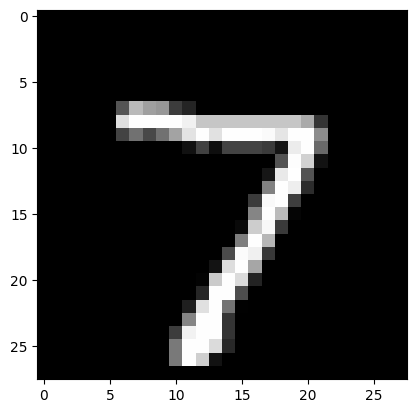

In [42]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

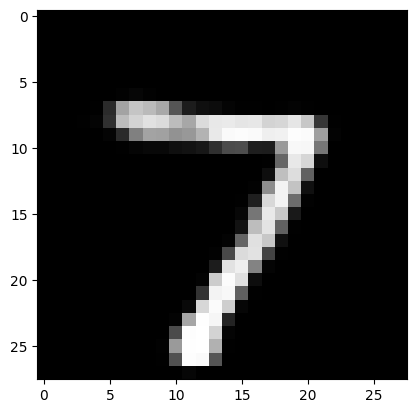

In [43]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray');

### Encoding and decoding the test images

In [44]:
X_test.shape[0]

10000

1/1 [==============================] - 0s 22ms/step


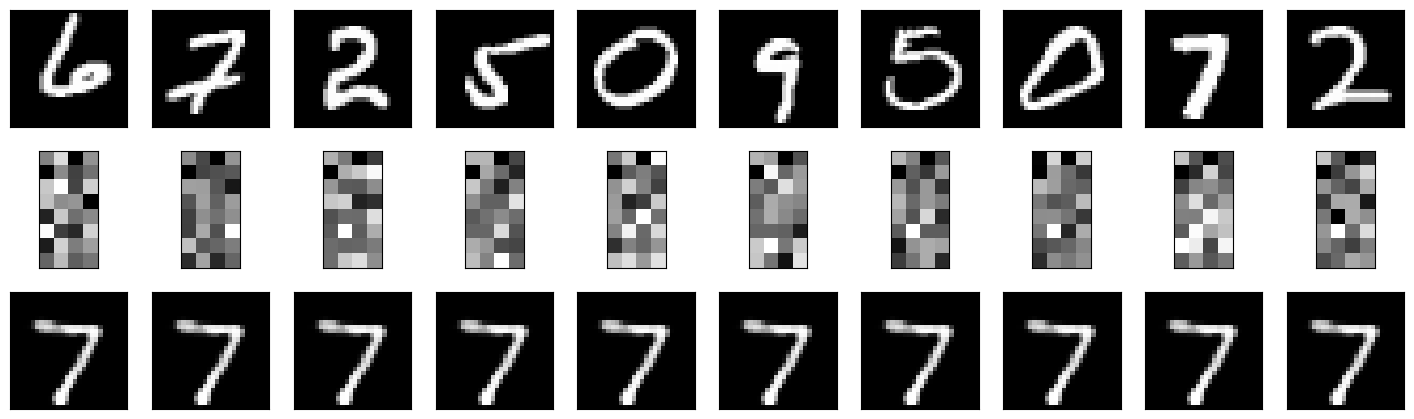

In [45]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size=n_images)

# Print(test_images)
plt.figure(figsize=(18, 18))
for i, image_index in enumerate(test_images):
    
    # Print(i, image)index)
    # Original image
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    # Coded image
    ax = plt.subplot(10, 10, i + 1 + n_images)
    encoded_image = encoder.predict(X_test[image_index].reshape(1, -1))
    plt.imshow(encoded_image.reshape(8, 4), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    
    # Decoded Images
    ax = plt.subplot(10, 10, i + 1 + n_images * 2)
    plt.imshow(decoder.predict(encode_image).reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())